In [1]:
# Dependencies
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt

# Twitter API Keys
consumer_key = "Ed4RNulN1lp7AbOooHa9STCoU"
consumer_secret = "P7cUJlmJZq0VaCY0Jg7COliwQqzK0qYEyUF9Y0idx4ujb3ZlW5"
access_token = "839621358724198402-dzdOsx2WWHrSuBwyNUiqSEnTivHozAZ"
access_token_secret = "dCZ80uNRbFDjxdU2EckmNiSckdoATach6Q8zb7YYYE5ER"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
# Array of Trains
delayed_trains = {}
    
# Target User
target_user = "SubwayStats"

# Loop through 50 pages of 
for x in range(50):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page=x)

    # Loop through all tweets
    for tweet in public_tweets:
        
        # Break tweet text into an array of lowercase words
        tweet_text = tweet["text"].lower().split(" ")
        
        # Print the tweet and date if it contains the word: "delays" or "change"
        if("delays" in tweet_text or "change" in tweet_text):
            print(tweet["text"].lower())
            
            # Loop through hashtags to extract the train names
            for hashtag in tweet["entities"]["hashtags"]:
                
                train_name = hashtag["text"].lower()
                
                # Remove all hashtags that are extraneous
                if (train_name != "nycsubway" and train_name != "mta" and train_name != "nyc"):
                                        
                    # If train is new, add it the list...
                    if(train_name not in delayed_trains):
                        delayed_trains[train_name] = 1
                    
                    # If it already exists add 1 to its count
                    else:    
                        delayed_trains[train_name] += 1 

#ntrain #qtrain #rtrain #wtrain have delays  #mta https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have service change  #mta https://t.co/jh4u3ctg8s
delays reported on #sirtrain  #mta https://t.co/jh4u3ctg8s
#1train #2train and #3train have delays  #nyc https://t.co/jh4u3ctg8s
#ntrain #qtrain #rtrain #wtrain have delays  #nyc https://t.co/jh4u3ctg8s
delays reported on #btrain #dtrain #ftrain #mtrain  #mta https://t.co/jh4u3ctg8s
#atrain #ctrain and #etrain have delays  #mta https://t.co/jh4u3ctg8s
#btrain #dtrain #ftrain #mtrain have service change  #nyc https://t.co/jh4u3ctg8s
#atrain #ctrain and #etrain have service change  #nycsubway https://t.co/jh4u3ctg8s
service change on #1train #2train and #3train  #mta https://t.co/jh4u3ctg8s
#1train #2train and #3train have delays  #mta https://t.co/jh4u3ctg8s
#1train #2train and #3train have delays  #nycsubway https://t.co/jh4u3ctg8s
service change on #4train #5train and #6train  #mta https://t.co/jh4u3ctg8s
delays on #ntrain #qtrain 

In [3]:
# Print the Train Delay counts
print(delayed_trains)

# Convert Train Delay object into a series
delayed_trains_pd = pd.Series(delayed_trains)

# Preview the results
delayed_trains_pd

{'ntrain': 103, 'qtrain': 103, 'rtrain': 103, 'wtrain': 103, 'btrain': 144, 'dtrain': 144, 'ftrain': 144, 'mtrain': 144, 'sirtrain': 3, '1train': 112, '2train': 112, '3train': 112, 'atrain': 104, 'ctrain': 104, 'etrain': 104, '4train': 141, '5train': 141, '6train': 141, 'ltrain': 32, '7train': 29, 'jtrain': 30, 'ztrain': 30, 'strain': 2, 'gtrain': 11}


1train      112
2train      112
3train      112
4train      141
5train      141
6train      141
7train       29
atrain      104
btrain      144
ctrain      104
dtrain      144
etrain      104
ftrain      144
gtrain       11
jtrain       30
ltrain       32
mtrain      144
ntrain      103
qtrain      103
rtrain      103
sirtrain      3
strain        2
wtrain      103
ztrain       30
dtype: int64

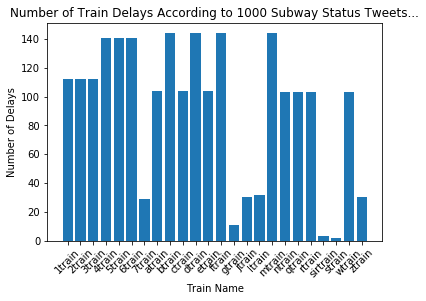

In [4]:
# Create a plot  
len(delayed_trains_pd.index)
plt.bar(range(len(delayed_trains_pd.index)), delayed_trains_pd.values)
plt.xticks(range(len(delayed_trains_pd.index)), delayed_trains_pd.index, rotation=45)
plt.ylabel("Number of Delays")
plt.xlabel("Train Name")
plt.title("Number of Train Delays According to 1000 Subway Status Tweets...")
plt.show()